# User's Activity Initial Exploration notebook

Extracting a particular user's activity (posts, comments)

- Pie chart of which subreddits they post/comment
- Scatter Plot of user's parcitipation in subreddits over time

In [1]:
from matplotlib.pyplot import *
import numpy

In [1]:
import praw

reddit = praw.Reddit(client_id='1QKQYY6zEUgYUw',
                     client_secret='8xyLf9B_raDH9FIs54t3yzYqBqc',
                     password='redditpw',
                     user_agent='testscript by /u/praw_test_1',
                     username='praw_test_1')

In [3]:
reddit.config.store_json_result = True
subreddit = reddit.subreddit("machinelearning")

## Exploring API

In [4]:
for post in subreddit.hot(limit=2):
    print(post.title)

[D] What is the best ML paper you read in 2018 and why?
[D] Machine Learning - WAYR (What Are You Reading) - Week 57


In [5]:
for submission in reddit.subreddit('all').search('praw'):
    print(submission.title)
    print(submission.id)

Nowy paszport: Hasło "Bóg, Honor, Ojczyzna" narusza wolność sumienia i wyznania? Do Rzecznika Praw Obywatelskich wpłynęło ponad 1,5 tys. skarg
aw34rw
Chiny wytykające USA pogwałcenia praw człowieka
b1cemw
Price Change History Cryptocurrency, Gain and Loss of Value
b2c6wg
„Bóg, Honor, Ojczyzna” w nowym paszporcie. Ponad 1500 osób wniosło skargę do Rzecznika Praw Obywatelskich
az3i2i
Help change wikipedia article name from "Partitions of Poland" to "Partitions Of Polish-Lithuanian Commonwealth"
awtuhm
Biskupi o deklaracji LGBT+. "Sprzeczna z prawem rodziców"
ayqv7r
[No Spoilers] Story?
avvwnu
No i tego, demokracja?
aydgt4
Free upvotes. I’ll upvote your comments
b2b7le
Prychłem mocno. A ja nigdy nie prycham xD
at8zj2
Europe after Treaty of Utrecht 1713
azjzpq
How to check if Redditor/Subreddit exists?
b2vcki
Direct messages using PRAW
b3k704
Looking for some help with creating a bot for a subreddit I created. Would like it to do 2 things. Any help would be great.
avlbl6
I am working on wa

## A user's activity posting and commenting

In [6]:
sub_posts = []

for submission in reddit.redditor('ex_addict_bro').submissions.top('all'):
#     print(submission.subreddit)
    
    sub_posts.append(submission.subreddit.display_name)
    
l = list(numpy.array(sub_posts))
unique, counts = numpy.unique(l, return_counts=True)
dict(zip(unique, counts))

{'AskReddit': 1,
 'ThankTRP': 1,
 'TwoXChromosomes': 1,
 'amishadowbanned': 1,
 'askMRP': 11,
 'asktrp': 6,
 'marriedredpill': 29,
 'swoleacceptance': 1}

In [8]:
# COMMENTS FOR A USER
sub_comments = []

for submission in reddit.redditor('ex_addict_bro').comments.top('all'):
#     print(submission.subreddit)
    
    sub_comments.append(submission.subreddit.display_name)
    
k = list(numpy.array(sub_comments))
unique_comments, counts_comments = numpy.unique(k, return_counts=True)
dict(zip(unique_comments, counts_comments))

{'The_Donald': 1,
 'askMRP': 40,
 'asktrp': 26,
 'marriedredpill': 30,
 'swoleacceptance': 3}

([<matplotlib.patches.Wedge at 0x1194e75f8>,
 [Text(1.097913661463123, 0.0677169991408271, 'AskReddit'),
  Text(1.0812704083303768, 0.20212447666984867, 'ThankTRP'),
  Text(1.0482361968350138, 0.3334679529503048, 'TwoXChromosomes'),
  Text(0.9993117919854818, 0.4597563946252031, 'amishadowbanned'),
  Text(0.42876443644614376, 1.0129960799721887, 'askMRP'),
  Text(-0.6628981278158411, 0.8778189290156899, 'asktrp'),
  Text(-0.3655901613420098, -1.0374699195301633, 'marriedredpill'),
  Text(1.097913674935863, -0.06771678070337234, 'swoleacceptance')])

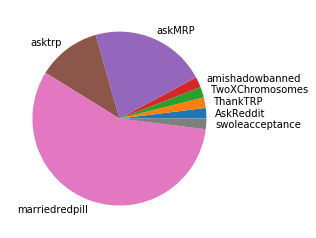

In [9]:
matplotlib.pyplot.pie(counts, explode=None, labels=unique)

([<matplotlib.patches.Wedge at 0x1197f2dd8>,
 [Text(1.099457216426567, 0.03455183421390152, 'The_Donald'),
  Text(0.27355885742688163, 1.0654414819797937, 'askMRP'),
  Text(-1.0654414755766863, -0.2735588823653393, 'asktrp'),
  Text(0.4683572342337857, -0.9953097513542601, 'marriedredpill'),
  Text(1.0951181661275413, -0.1035190910772067, 'swoleacceptance')])

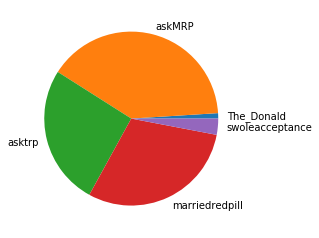

In [10]:
matplotlib.pyplot.pie(counts_comments, explode=None, labels=unique_comments)

## User's parcitipation in subreddits over time

In [25]:
import pandas as pd


# COMMENTS FOR A USER - IN TIME
sub_name = []
sub_id = []
sub_time = []


for comment in reddit.redditor('ex_addict_bro').comments.top('all'):
    sub_name.append(comment.subreddit.display_name)
    sub_id.append(comment.id)
    sub_time.append(comment.created_utc)
    
for post in reddit.redditor('ex_addict_bro').submissions.top('all'):
    sub_name.append(post.subreddit.display_name)
    sub_id.append(post.id)
    sub_time.append(post.created_utc)

<function matplotlib.pyplot.show(*args, **kw)>

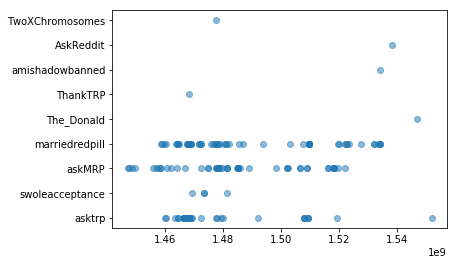

In [29]:
import matplotlib.pyplot as plt


df=pd.DataFrame({'x': sub_time, 'y1': sub_name})
# plt.plot( 'x', 'y1', data=df)

plt.scatter(sub_time, sub_name, alpha=0.5)
plt.show


In [43]:
#What did he post on TwoXChromosomes?
# for submission in reddit.redditor('ex_addict_bro').submissions.top('all'):
#      print(submission.id if submission.subreddit == 'TwoXChromosomes' else 0)